In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

customer_df = pd.read_csv('files_for_lab/customer_value_analysis.csv')

print(customer_df.head())
print(customer_df.shape)
print(customer_df.info())  


customer_df.columns = customer_df.columns.str.lower().str.replace(' ', '_')

customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'], format='%m/%d/%y')

nan_values = customer_df.isnull().sum()
print(nan_values)

def split_numerical_categorical(df):
    numerical_df = df.select_dtypes(include=np.number)
    categorical_df = df.select_dtypes(include=['object', 'datetime64[ns]'])
    return numerical_df, categorical_df


customer_df = customer_df.drop(columns=['customer'])

numerical_columns, categorical_columns = split_numerical_categorical(customer_df)

print(numerical_columns.head())
print(categorical_columns.head())


  Customer       State  Customer Lifetime Value Response  Coverage Education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  Effective To Date EmploymentStatus Gender  Income  ...  \
0           2/24/11         Employed      F   56274  ...   
1           1/31/11       Unemployed      F       0  ...   
2           2/19/11         Employed      F   48767  ...   
3           1/20/11       Unemployed      M       0  ...   
4            2/3/11         Employed      M   43836  ...   

  Months Since Policy Inception Number of Open Complaints  Number of Policies  \
0                             5                         0                   1

In [19]:
correlation_matrix = numerical_columns.corr()
print(correlation_matrix)

max_corr_pair = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates().head(1)
print(max_corr_pair)
# customer_lifetime_value have the highest correlation because its the same one, its obviously then always 1.0

                               customer_lifetime_value    income  \
customer_lifetime_value                       1.000000  0.024366   
income                                        0.024366  1.000000   
monthly_premium_auto                          0.396262 -0.016665   
months_since_last_claim                       0.011517 -0.026715   
months_since_policy_inception                 0.009418 -0.000875   
number_of_open_complaints                    -0.036343  0.006408   
number_of_policies                            0.021955 -0.008656   
total_claim_amount                            0.226451 -0.355254   

                               monthly_premium_auto  months_since_last_claim  \
customer_lifetime_value                    0.396262                 0.011517   
income                                    -0.016665                -0.026715   
monthly_premium_auto                       1.000000                 0.005026   
months_since_last_claim                    0.005026                

In [34]:
def categorize_numerical_columns(df, threshold=36):
    continuous_df = df.select_dtypes(include='number').loc[:, df.nunique() > threshold]
    discrete_df = df.select_dtypes(include='number').loc[:, df.nunique() <= threshold]
    return continuous_df, discrete_df

continuous_df, discrete_df = categorize_numerical_columns(numerical_columns)

print("Continuous Numerical Columns:")
print(continuous_df.head())

print("Discrete Numerical Columns:")
print(discrete_df.head())


Continuous Numerical Columns:
   customer_lifetime_value  income  monthly_premium_auto  \
0              2763.519279   56274                    69   
1              6979.535903       0                    94   
2             12887.431650   48767                   108   
3              7645.861827       0                   106   
4              2813.692575   43836                    73   

   months_since_policy_inception  total_claim_amount  
0                              5          384.811147  
1                             42         1131.464935  
2                             38          566.472247  
3                             65          529.881344  
4                             44          138.130879  
Discrete Numerical Columns:
   months_since_last_claim  number_of_open_complaints  number_of_policies
0                       32                          0                   1
1                       13                          0                   8
2                       18   

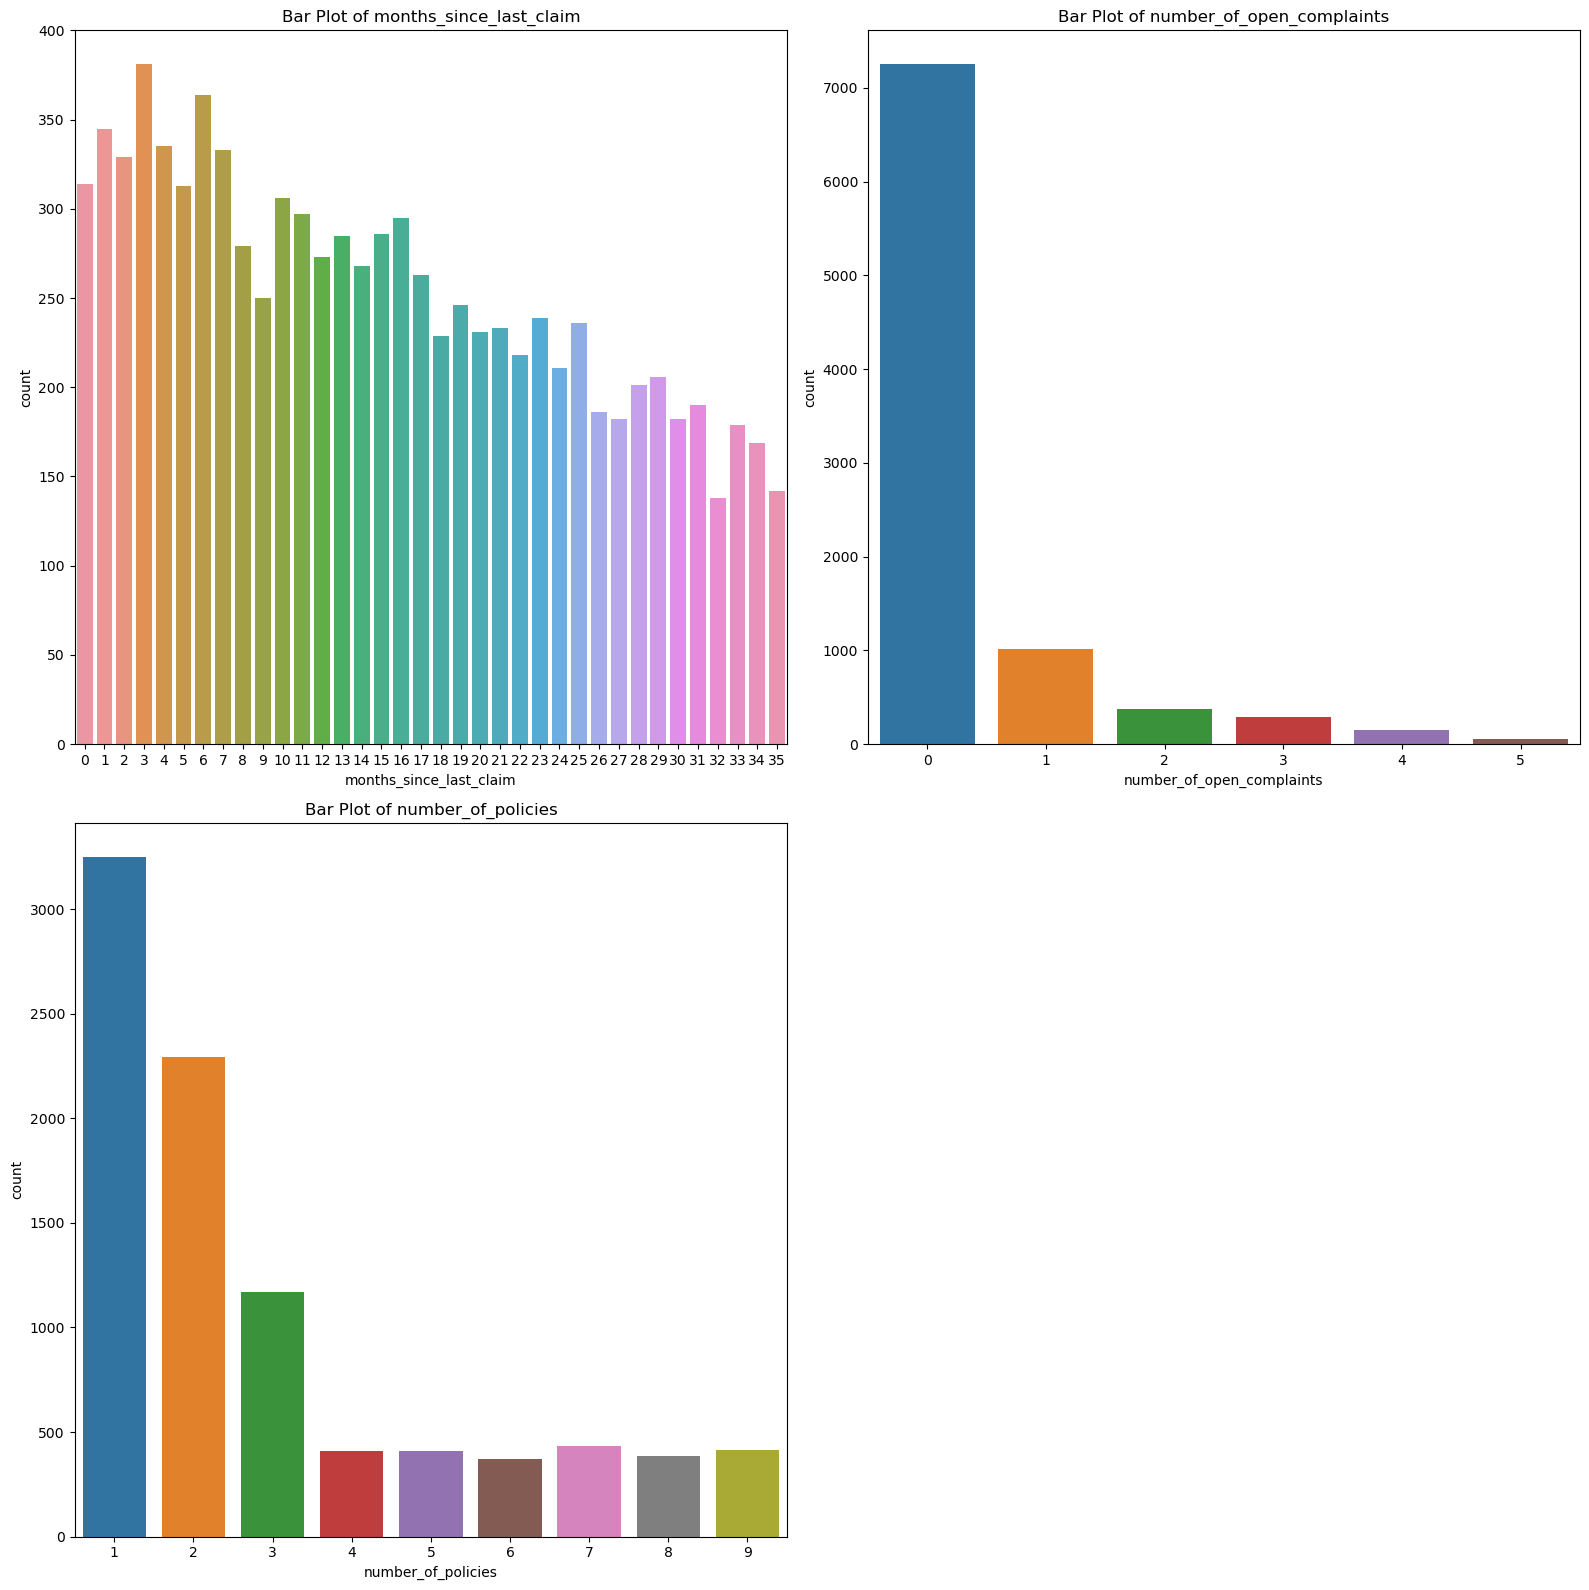

In [35]:
def plot_discrete_columns(dataframe):
    
    plt.figure(figsize=(16, 16))

    num_cols = 2
    num_rows = (len(dataframe.columns) + num_cols - 1) // num_cols

    for i, column in enumerate(dataframe.columns):
        plt.subplot(num_rows, num_cols, i + 1)
        sns.countplot(x=column, data=dataframe)
        plt.title(f'Bar Plot of {column}')

    
    plt.tight_layout()
    plt.show()

plot_discrete_columns(discrete_df)

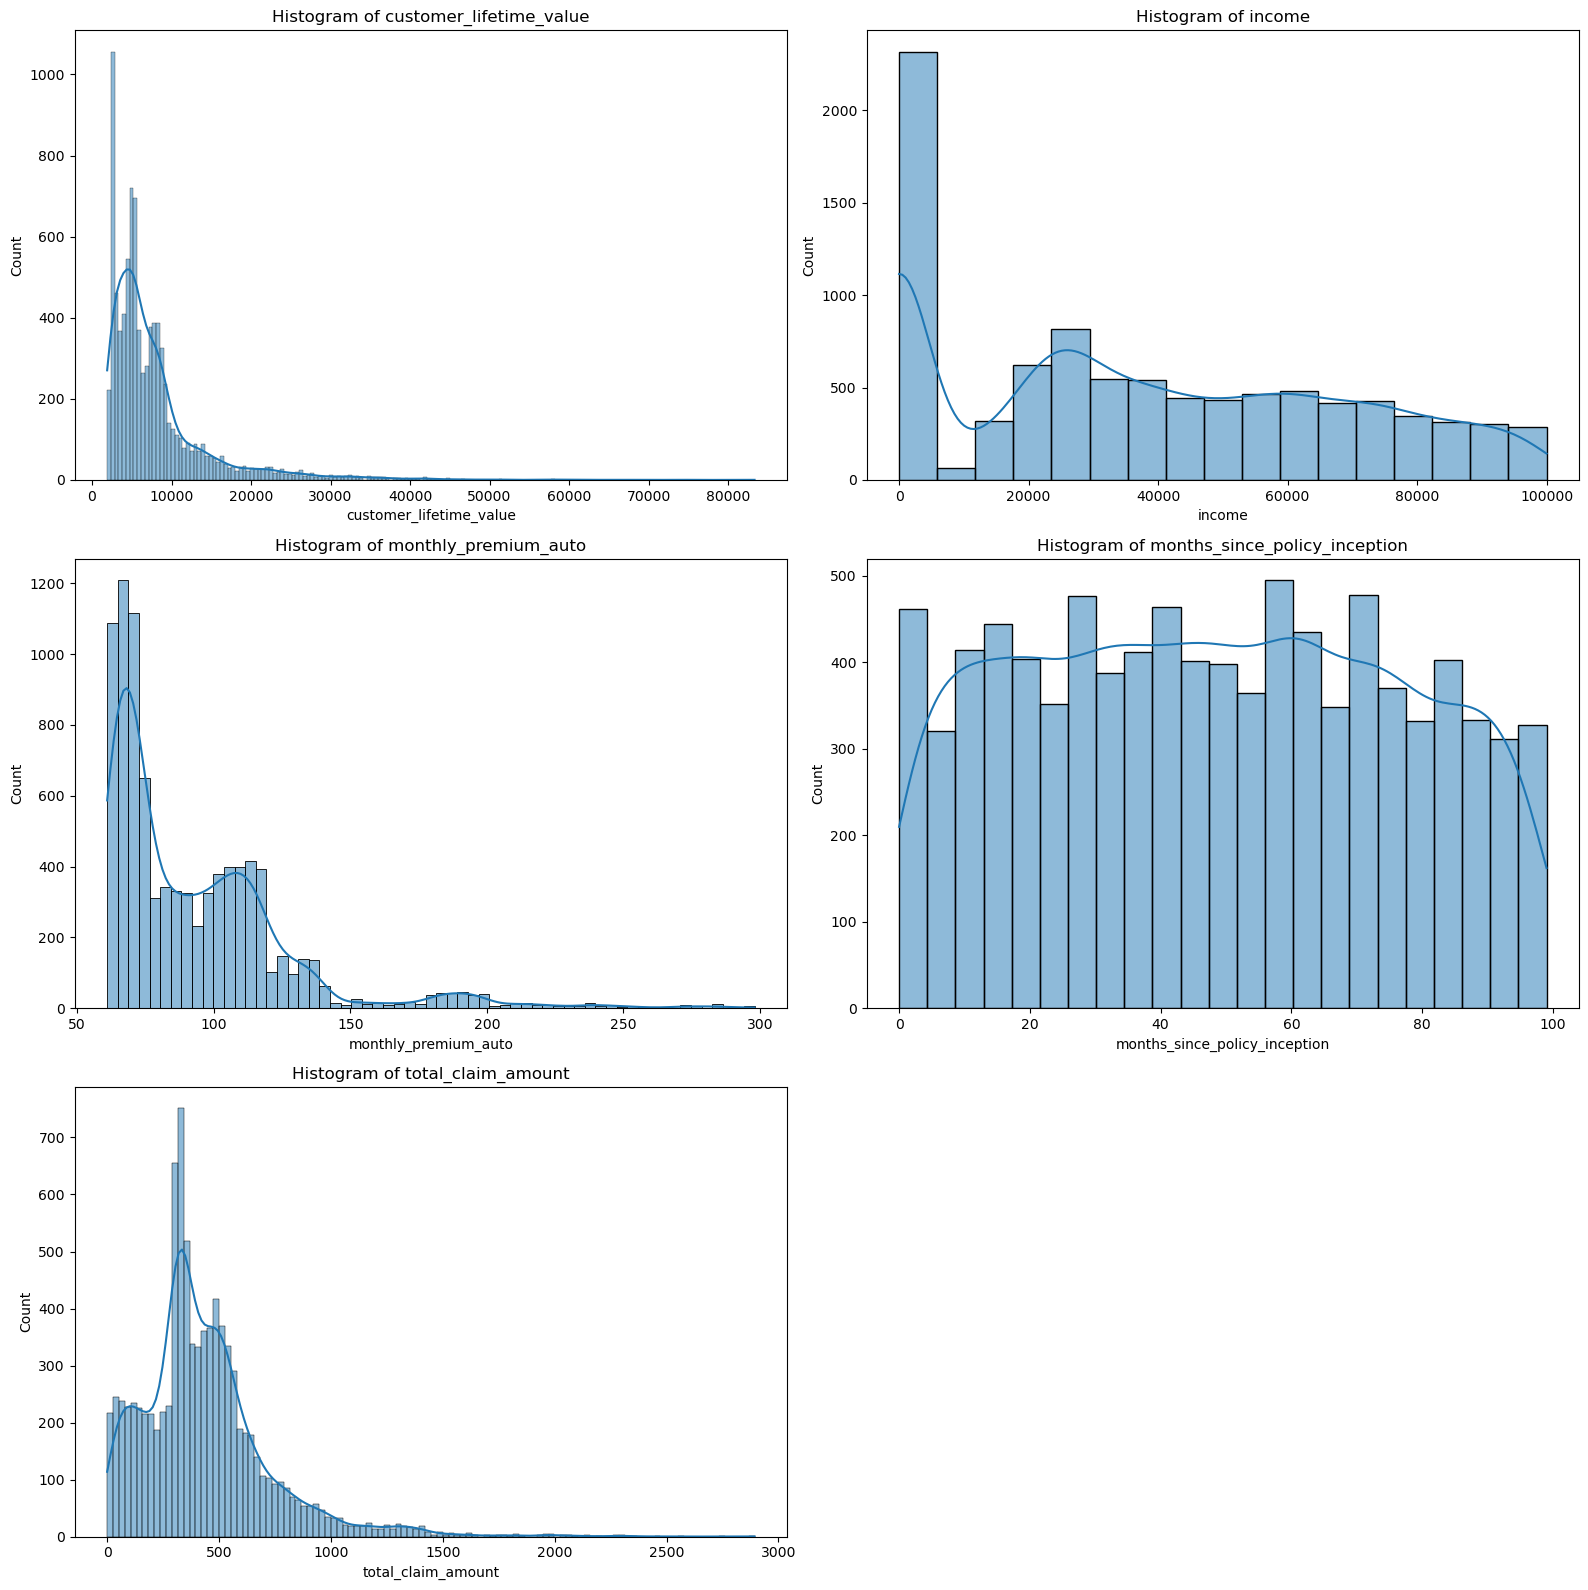

In [39]:
def plot_continuous_columns(dataframe):
    
    plt.figure(figsize=(16, 16))

    num_cols = 2
    num_rows = (len(dataframe.columns) + num_cols - 1) // num_cols

    for i, column in enumerate(dataframe.columns):
        plt.subplot(num_rows, num_cols, i+1)
        sns.histplot(dataframe[column], kde=True)
        plt.title(f'Histogram of {column}')

   
    plt.tight_layout()
    plt.show()

plot_continuous_columns(continuous_df)

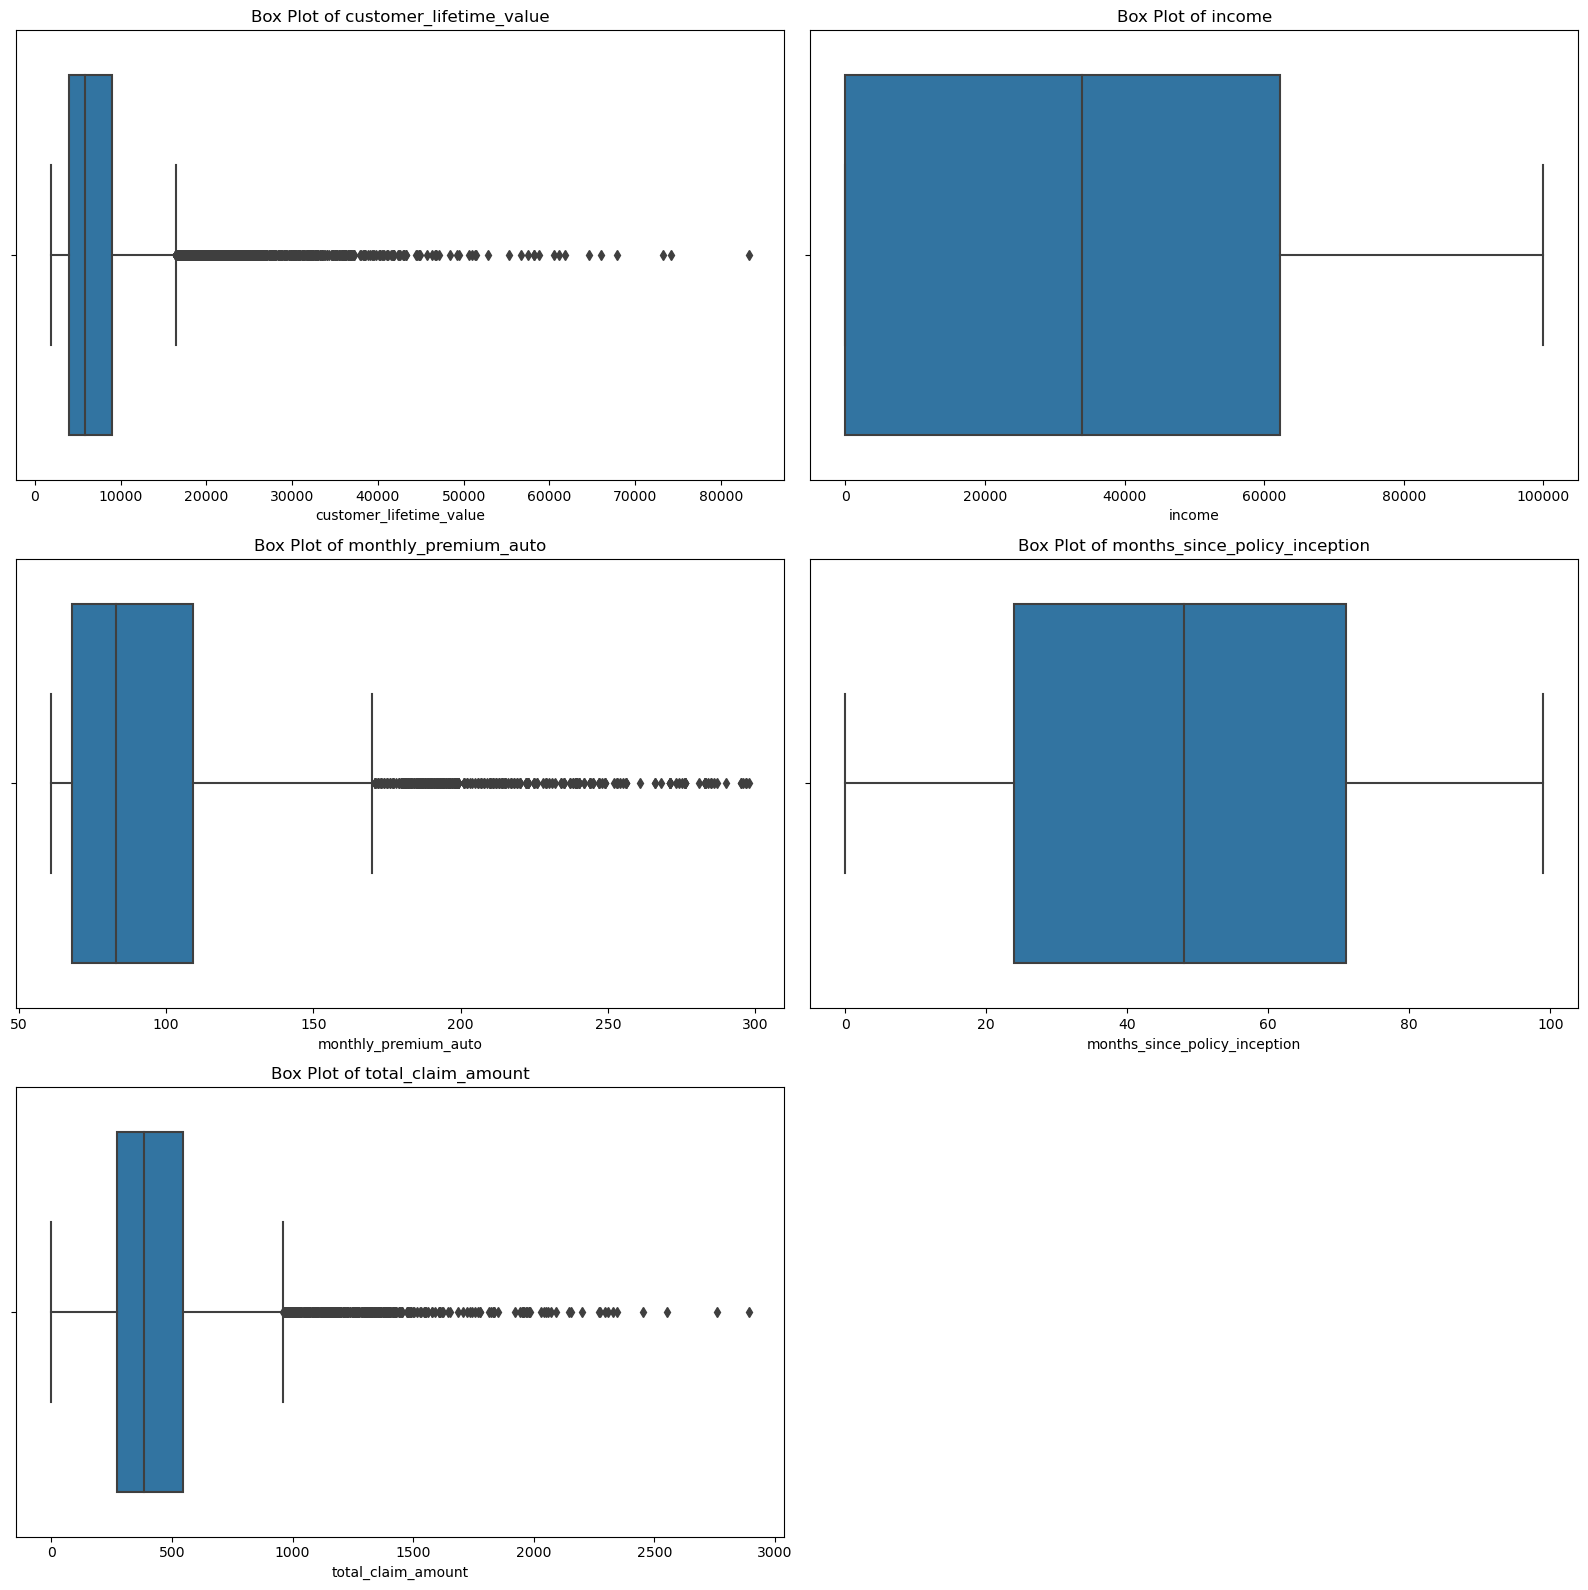

In [43]:
def plot_outliers(dataframe):
    plt.figure(figsize=(16, 16))
    num_cols = 2
    num_rows = (len(dataframe.columns) + num_cols - 1) // num_cols

    for i, column in enumerate(dataframe.columns):
        plt.subplot(num_rows, num_cols, i+1)
        sns.boxplot(x=dataframe[column])
        plt.title(f'Box Plot of {column}')

    plt.tight_layout()
    plt.show()

plot_outliers(continuous_df)